**Note**: This week, instead of submitting your homework in `.py` files or `.md` files, please show all your work right here in this handy dandy notebook!

We will grade this by clicking "Restart and Run all," and all of the cells in this notebook should produce the output to show your answers on each problem.

### Problem 0:

The Fictional Bureau of Public Health tests the water in various locations around MagicLand for a toxic substance called Mercuronium. 

Mercuronium starts to cause symptoms, like lightheadedness, at around 495 parts per million. At a higher concentration (like 500 parts per million), the symptoms progress to headaches. At 505 parts per million, the symptoms become more severe and possibly permanent. So the government recommends that all water sources be kept under 490 parts per million of Mercuronium and sends toxicologists out to various locations to test the water. It is known that the tests are not perfect, so to avoid uncertainty, the toxicologists are sent on a pretty regular basis to take multiple measurements. 

Import the data from `toxicology_data.csv`, which contains the toxicologists' findings. Please include your pandas code in the cell below to show your work:

In [34]:
import sys
!{sys.executable} -m pip install pandas

import pandas as pd

# YOUR CODE HERE
df = pd.read_csv('toxicology_data.csv')

df


,Date,Time of Day,Assessor,Location,Reading (Parts per Million)
0,1/1/2020,morning,Goodwin Schmitz,Chamber of Secrets,440.411443
1,1/1/2020,morning,Goodwin Schmitz,Forbidden Forest A,523.502061
2,1/1/2020,morning,Anubha Momen,Forbidden Forest B,460.033744
3,1/1/2020,morning,Li Qin Shen,Hogwarts School Grounds A,444.277126
4,1/1/2020,evening,Phillipe Juncadella,Nocturn Alley,520.789289
...,...,...,...,...,...
636,7/17/20,evening,Angela Birkenstock,Hogwarts School Grounds A,505.296513
637,7/17/2020,evening,Rachel Cohen,Nocturn Alley,508.638067
638,7/17/20,evening,Intern 2,The Leaky Cauldron,463.695277
639,7/18/2020,evening,Anubha Momen,Forbidden Forest A,520.258729


### Problem 1:

Find the number of readings taken for each location in the data, as well as the mean and standard deviation of the readings for each location.

In [37]:
# YOUR CODE HERE
groups = df.groupby("Location")
new_df = groups.mean()
new_df.columns=['Reading_mean']
new_df = new_df.assign(Reading_std= groups.std())
new_df = new_df.assign(Number = groups.size())
new_df
#print(new_df)

,Reading_mean,Reading_std,Number
Location,,,
Chamber of Secrets,405.361168,54.248432,7
Forbidden Forest A,501.380437,24.942126,200
Forbidden Forest B,428.418984,59.243695,200
Hogwarts School Grounds A,455.172121,57.819681,100
Nocturn Alley,501.937334,21.032674,34
The Leaky Cauldron,483.867230,37.293226,100


### Problem 2:

Remember—the fewer measurements we have for a place, the more uncertainty we have that the aggregate metrics for our measurements accurately represent the _real_ numbers. Calculate the top and bottom of the confidence interval for the average reading in each location, and add it to your location data in columns called `reading_bottom_conf_inv` and `reading_top_conf_inv`. You can use the confidence interval function defined below.

In [5]:
import sys
!{sys.executable} -m pip install scipy

import math
from scipy.stats import t
import numpy as np

def confidence_interval_for_collection(sample_size=[], standard_deviation=[], mean=[], confidence=0.95):
    degrees_freedom = [count - 1 for count in sample_size]
    outlier_tails = (1.0 - confidence) / 2.0
    confidence_collection = [outlier_tails for _ in sample_size]
    t_distribution_number = [-1 * t.ppf(tails, df) for tails, df in zip(confidence_collection, degrees_freedom)]

    step_1 = [std/math.sqrt(count) for std, count in zip(standard_deviation, sample_size)]
    step_2 = [step * t for step, t in zip(step_1, t_distribution_number)]

    low_end = [mean_num - step_num for mean_num, step_num in zip(mean, step_2)]
    high_end = [mean_num + step_num for mean_num, step_num in zip(mean, step_2)]

    return low_end, high_end

In [20]:
print(len(new_df))
print(new_df['Reading_std'].values)

6
[54.24843214 24.94212571 59.24369451 57.81968095 21.03267355 37.29322648]


In [49]:
low_end,high_end = confidence_interval_for_collection(new_df['Number'], new_df['Reading_std'].values, new_df['Reading_mean'].values)

In [93]:
# YOUR CODE HERE
new_df = new_df.assign(reading_bottom_conf_inv = low_end, reading_top_conf_inv = high_end)
new_df

,Reading_mean,Reading_std,Number,reading_bottom_conf_inv,reading_top_conf_inv
Location,,,,,
Chamber of Secrets,405.361168,54.248432,7,355.189736,455.532600
Forbidden Forest A,501.380437,24.942126,200,497.902547,504.858327
Forbidden Forest B,428.418984,59.243695,200,420.158139,436.679829
Hogwarts School Grounds A,455.172121,57.819681,100,443.699442,466.644800
Nocturn Alley,501.937334,21.032674,34,494.598687,509.275981
The Leaky Cauldron,483.867230,37.293226,100,476.467445,491.267015


### Problem 3:

Your dataframe from problem 2 is not so intuitive for the bureau to understand, so you should make a visualization that will help them absorb the information. Here is an example visualization that fulfills the requirements:

![](../images/example_chart.png)

**You can take some design liberties with this plot, but here is what needs to be there:**

- It needs to be a scatterplot, with the dot representing the mean water reading. It should not be a line plot, since a line plot communicates some kind of relationship between the points that isn't there and would mislead the bureau.
- Each dot should have a set of error bars around it showing the upper and lower end of the confidence interval for its mean water reading.
- The chart should have the reading numbers labeled so the bureau can get a general idea of the reading numbers from the chart.
- The locations need to be labeled so you can tell which location corresponds to each water reading.
- The location labels need to be legible (not run into each other). You can do this by adjusting the proportions of the figure to spread out the names, by rotating the names (as I have done in the example), or by orienting your plot so that the locations are on the Y axis. You _should not_ do this by making the font on the labels smaller: that makes the chart inaccessible because people can't always read tiny fonts.
- Change either the background color or the dot color. Feel free to change one or both. In the example, I have changed both. There should still be enough contrast to see the dots on the background.
- The chart should have a title. 
- The chart should have a legend. _The legend should not cover up any of the dots or error bars_.

In [172]:
import sys
!{sys.executable} -m pip install np
!{sys.executable} -m pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your Code Here


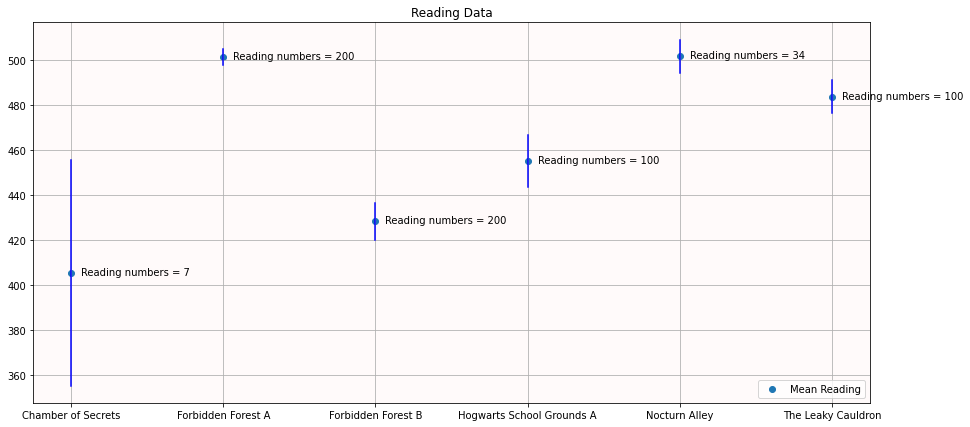

In [171]:

plt.figure(figsize=(15,7), facecolor = 'white')
plt.grid()
plt.title("Reading Data")
ax = plt.gca()
ax.set_facecolor('snow')

plt.scatter(new_df.index.values, new_df["Reading_mean"].values)
plt.legend(['Mean Reading'],loc ="lower right")

# plt.scatter(new_df.index.values, new_df["reading_bottom_conf_inv"].values)
# plt.scatter(new_df.index.values, new_df["reading_top_conf_inv"].values)


for index, row in enumerate(new_df.values):
    x = [index, index]
    y = [row[3], row[4]]
    plt.plot(x,y,'b')
    label = "Reading numbers = " + str(int(row[2]))
    plt.annotate(label, (index, row[0]), textcoords="offset points", xytext=(10,-2) )

plt.show()

### Problem 4:

If we want to make absolutely certain that the people of MagicLand are safe, which metric should we use to estimate the Mercuronium reading for the various locations? How would you describe what that metric means for the probability that the water is safe?

### YOUR ANSWER HERE

>In order to make absolutely certain that the people of MagicLand are safe, we need to make sure that the maximum value of every location is under 490 parts per million of Mercuronium. 

>If we use the maxium value, it means we have 100% sure that the water is safe. If we use the top of the 95% confidence interval, it is about 95% sure that the water is safe. Though it is not what the confidence interval means, we can think of it this way.

### Problem 5:

Do you think Mercuronium poisoning is a continuous or a categorical variable? Why?

### YOUR ANSWER HERE

> I think it is a continuous variable, because we cannot say 99 is good but 100 is bad. But we can set a standard line, and it is also safe to be a little bit higher than the standard line. But we should keep it under the standard line to make sure that we are safe.

### Problem 6:

The bureau suspects that Mercuronium readings might be higher in the evenings than in the mornings. Test their hypothesis. You can use the T-test code provided below.

In [173]:
def t_test_for(num_samples_1, standard_deviation_1, mean_1, num_samples_2, standard_deviation_2, mean_2, confidence=0.95):
    alpha = 1 - confidence
    total_degrees_freedom = num_samples_1 + num_samples_2 - 2

    t_distribution_number =-1 * t.ppf(alpha, total_degrees_freedom)

    degrees_freedom_1 = num_samples_1 - 1
    degrees_freedom_2 = num_samples_2 - 1
    sum_of_squares_1 = (standard_deviation_1 ** 2) * degrees_freedom_1
    sum_of_squares_2 = (standard_deviation_2 ** 2) * degrees_freedom_2

    combined_variance = (sum_of_squares_1 + sum_of_squares_2) / (degrees_freedom_1 + degrees_freedom_2)
    first_dividend_addend = combined_variance/float(num_samples_1)
    second_dividend_addend = combined_variance/float(num_samples_2)

    denominator = math.sqrt(first_dividend_addend + second_dividend_addend)
    numerator = mean_1 - mean_2
    t_value = float(numerator)/float(denominator)

    accept_null_hypothesis = abs(t_value) < abs(t_distribution_number) #results are not significant

    return accept_null_hypothesis, t_value

In [207]:
# YOUR CODE HERE
groups2 = df.groupby("Time of Day")
new_df2 = groups2.mean()
new_df2.columns=['Reading_mean']
new_df2 = new_df2.assign(Reading_std= groups.std())
new_df2 = new_df2.assign(Number = groups.size())
new_df2
#print(new_df)

,Reading_mean,Reading_std,Number
Time of Day,,,
evening,470.960653,NaN,NaN
morning,464.636588,NaN,NaN


In [203]:
new_df2.loc['evening']['Number']

306.0

In [205]:
t_test_for(new_df2.loc['evening']['Number'], \
           new_df2.loc['evening']['Reading_std'], \
           new_df2.loc['evening']['Reading_mean'],\
           new_df2.loc['morning']['Number'], \
           new_df2.loc['morning']['Reading_std'], \
           new_df2.loc['morning']['Reading_mean'])

(True, 1.4436017594956587)

### Problem 7:

Would you say that readings are appreciably higher in the evenings than in the mornings? Why or why not?

### YOUR ANSWER HERE

> No, I don't think it is appreciably higher, because the t value is 1.44, which is not large than 2. We can also see this from the mean and std, though the mean of morning is lower, but it has higher std.

### Problem 8:

Disappointed with this finding, the bureau notes that we also have data on which assessor did each reading. They now want you to go back and see if you can find a connection between the assessors and the ratings—maybe someone is assessing too harshly? 

How would you caution them about this decision?

In [208]:
# YOUR CODE HERE
groups3 = df.groupby(["Location", "Assessor"])
new_df3 = groups3.mean()
new_df3.columns=['Reading_mean']
new_df3 = new_df3.assign(Reading_std= groups.std())
new_df3 = new_df3.assign(Number = groups.size())
new_df3
#print(new_df)

Reading_mean  Reading_std  \
Location                  Assessor                                         
Chamber of Secrets        Angela Birkenstock     396.822596    69.180633   
                          Goodwin Schmitz        411.765097    50.671069   
Forbidden Forest A        Anubha Momen           503.081160    25.628187   
                          Art Bagleur            500.297464    22.056915   
                          Durman Dinks           496.732341    25.372799   
                          Goodwin Schmitz        523.502061          NaN   
                          Radhika Patel          504.996152    20.221501   
Forbidden Forest B        Anubha Momen           446.047986    66.759419   
                          Cici Onyekwwere        426.007253    59.104601   
                          Onsi Bahksh            420.358232    53.802234   
                          Phillipe Juncadella    426.055433    58.792160   
                          Radhika Patel          434.794069    62.561826   
Hogwarts School Grounds A Angela Birkenstock     468.939466    62.235217   
                          Intern 1               363.934396          NaN   
                          Li Qin Shen            455.455388    59.190184   
                          Onsi Bahksh            448.411483    43.737007   
Nocturn Alley             Phillipe Juncadella    500.569963    28.854377   
                          Rachel Cohen           502.119650    20.419834   
The Leaky Cauldron        Cici Onyekwwere        479.219366    37.330634   
                          Intern 2               490.522577    30.865899   
                          Rachel Cohen           496.287076    45.989497   

                                               Number  
Location                  Assessor                     
Chamber of Secrets        Angela Birkenstock        3  
                          Goodwin Schmitz           4  
Forbidden Forest A        Anubha Momen            115  
                          Art Bagleur              16  
                          Durman Dinks             54  
                          Goodwin Schmitz           1  
                          Radhika Patel            14  
Forbidden Forest B        Anubha Momen             22  
                          Cici Onyekwwere          37  
                          Onsi Bahksh              43  
                          Phillipe Juncadella      66  
                          Radhika Patel            32  
Hogwarts School Grounds A Angela Birkenstock       12  
                          Intern 1                  1  
                          Li Qin Shen              73  
                          Onsi Bahksh              14  
Nocturn Alley             Phillipe Juncadella       4  
                          Rachel Cohen             30  
The Leaky Cauldron        Cici Onyekwwere          65  
                          Intern 2                 23  
                          Rachel Cohen             12

### YOUR ANSWER HERE

>  We can group by the data with "Location" and "Assessor" to find out if some assessor assessed too harshly in many locations. Actually, there are some data that seems unreasonable, for example Goodwin Schmitz in Forbidden Forest A and Intern 1 in Hogwarts School Grounds A. They only tested once and the readings they assessed are far different from other readings.